
# Model Notebook 

The goal of this notebook is to model the behavior of rats doing a foraging task using Optimal Control theory.  Our hypothesis is that rats behave optimally and try to maximize the amount of reward that they receive, while minimizing the movement cost to reach the reward and a cost linked to the passage of time (temporal discouting of rewards). The optimality of this behavior depends on each individual's own sensitivity to the cost of movement and cost of time. 


<!--
## Get main characteristics from behavior:


## Objective 1: Do rats behave optimally?
Minimize cost function with Effort and Time

Write code to generate optimal trajectories
    
Find a reasonable model for Effort:

      Speed: a * mass * (xdot-vtapis)**2 
      Force: a * (mass * u)**2
      Mixed: a * (mass * u)**2 * (xdot-vtapis)

    
Test shape of the trajectories/speed profiles/acceleration profiles that mimimize these Effort costs



Test if these Effort cost functions are universal

    Manipulate Distance, Time, Treadmill speed and see if trajectories/speed profiles/acceleration profiles keep the same shape (with scalling)
        



Include Time in the cost function, free-time OC

    Add a time variable directly in optimal_trajectory function
       No official documentation on Casadi, but found a code in which it's done. 
       See:  f(code in matlab, should be doable)

    Have Lower-level + Upper-level functions. 
       See: https://epubs.siam.org/doi/pdf/10.1137/1.9781611975758.10
    
Manipulate Effort/Time sensitivity ratio and generate trajectories

Fit generated trajectories to animal behavior to extract Effort/Time ratio -->


# Experiments description

Rats are free to run back and forth between two reward ports located at the extremity of a long corridor to get drop of water. 

Reward is manipulated by changing the probability of receiving a drop, alternating between 90% and 10% in 5min long blocks. This mean that the reward rates will be different in these two types of block, which should be assocaited with different Effort/Time compromise


The Effort/Time compromise (tradeoff) is also more directly manipulated by changing the distance between the two reward ports (60, 90, 120cm, Experiment 1), or changing the speed/direction of the treadmill (-20, -10, -2, 2, 10, 20 cm/s, Experiment 2).

Increasing the distance between the two reward ports intrinsically increases time before acquisition. Rats can therefore choose to modulate their effort to compensate for the increase in time. => Time/Effort trade-off

Every rat is trading effort against time, but we observe interindividual variability in this trade-off. We posit that this variability comes from different sensitivities to effort and time.  
We want to capture these elements in a simple mathematical model. 

In theory in this type of task, rats have to the maximize their total Capture Rate, $CR = (Σ Rewards - \alpha Σ Effort)/\betaΣ Time$.

For now, we focus on the running period of the behavior. The waiting period will be modelled later on.


# Main results

##   Effect of change in reward probability
In both experiments rats increase the number of runs when the reward prob is high, which make sense as the cost of time is higer in this condition. Interestingly they do not modulate their running speed. Modulation comes from waiting time between runs.  
[insert plot] 

##   Experiment 1: Distance between reward ports
Rats increase their running speed as distance increase  
Crossing time doubles when effective distance triples. 
[insert plot[pos][speed][acc]]  

##   Experiment 2: Speed/direction
Increase in running speed when the treadmill is going against the run.  
Decrease in runnning speed when treadmill is facilitating the run.  
Rats maintain a constant running time across all treadmill speeds  
[insert plot[pos][speed°][acc]]  °problem computing speed profile, rat not always running on treadmill (start of run on platform)  

# Which aspects of the behavior do we want to capture with the model?

##   Change in reward probability
Increasing the reward probability induced an increase in run number that is linked to a decrease in waiting time, and not an increase of running speed. 

##   Experiment 1: Lenght
Increase in speed when distance increases

##   Experiment 2: Speed/direction
Increase/decrease in runnning speed when treadmill is going against/along the movement.
Crossing time ~constant when treadmill direction/speed changes     

/!\ Not all rats maintain constant crossing time
    
  


# How to model
The Optimal Control theory relies upon the assumption that behavior is governed by optimality principles with respect to a cost function.
Here, we have an optimal control problem (OCP) in which the goal is to minimize a cost function that combines a movement cost and a cost of time, using acceleration as control. == find how the agent should accelerate to produce the trajectory that is optimal relative to the movement cost, time cost and their sensitivities. 
We can solve this OCP using CASADI, a Python/Matlab library [1].


# Write code to solve an OCP  
We want to find the trajectory that minimizes a cost function that includes Effort, Time and their sensitivities.  
We reuse and adapt the code from [2].


# Fixed time
Previous study tackled a similar problem, in which they modeled the behavior of rats and estimated their effort sensitivity [2]. We want to use the same approach, but have to estimate Effort and Time sensitivities.
We need to adapt this code to fit with our experimental conditions and include a Time component. 
Experimental conditions can be modified easily (e.g. change distance, final position, etc.).

Adding Time as a variable (free-time OC) is a bit more complicated, as CASADI documentation does not advertise free time problem solving.

# Free final time
Working in free final time is necessary as most of the aspects of behavior that we want to model suggest a trade off between effort and time. 

I found a  ressource that shows that it is possible [3], but is for a different type of problem, and is written in matlab.  
Translating matlab=>python is in progress.  
<br>  

# Optimal Control Model Description
<!--$ min(\alpha * Σ Effort + \beta*Σ Time)$  -->
Most of these parameters come from [2].  
We assume speed of rat follows this equation of motion:  
$\frac{dv}{dt} = u(t) - \frac{v}{\tau}$ &emsp; <font color='grey'>with v/tau = resistive force per unit mass, tau is friction coefficient</font>
<br>  
<font color='red'>define u please</font>
<br>  
State vector (Describes where an object is located in space and how it is moving, so here $x^0=$ Position and $x^1=$ Speed):  
$\mathbf{x} = [x^0, x^1]$  

 
State vector dynamics:  
$\dot{x}^0 = x^1$  &emsp;  
$\dot{x}^1 = u - \frac{x^1 - v_{Tread}}{\tau}$  &emsp; with $v_{Tread}$ = treadmill belt speed  
<br>  

Initial Conditions and Inequalities to constrain the problem:  
$x^0(0)=0$   &emsp; <font color='grey'>Start position is 0</font>  
$x^0(tf)=Ltread$  &emsp; <font color='grey'>End position is Ltread</font>  
$x^1(0)=0$  &emsp; <font color='grey'>Start speed is 0</font>  
$x^1(tf)=0$  &emsp; <font color='grey'>End speed is 0</font>  
$0 < x^0(t) < Ltread$  &emsp; <font color='grey'>Position constrained between 0 and apparatus lenght</font>  
$0 < x^1(t) < 2.5 m/s$  &emsp; <font color='grey'>Speed constrained between 0 and speed that is way above what the rats do in the experiments</font>  
with: &ensp; $0 < t < tf$  &emsp; <font color='grey'>t constrained between 0 and final time</font>  
&ensp; $-20 < u < 20$  &emsp; <font color='grey'>acceleration constrained between 0 and what the rat can physically do (might be too low here)</font>  


<br>  
The infinitesimal cost $C(t)$, for a rat of mass $m$ is assumed to be a combination of an Effort term $E(t)$ and a Cost of Time $G(t)$ term.  

&emsp; $\mathbf{C(t) = \alpha*E(t) + \beta*G(t)}$  
$\alpha$ represents Effort sensitivity and $\beta$ Time sensitivity.  
<br>
E(t) is either proportional to the kinetic energy or has a quadratic dependence on force (i.e., on the control). We also tried a mix between the two:  
&emsp; $E(t) = \alpha*m(x^1)²$  &emsp; <font color='grey'>Effort $\approx$ Kinetic energy</font>  
_OR_  
&emsp; $E(t) = \alpha*(mu)²$ &emsp; <font color='grey'>Effort $\approx$ Force²</font>  
_OR_  
&emsp; $E(t) = \alpha*(mu)²*x^1 $ &emsp; <font color='grey'>Effort $\approx$ mixed</font>
<br>  
G(t) is time discounting. G(0) = 0, and hyperbolic increase as t increases.  
&emsp; $G(t) = 1-\frac{1}{1+\beta t}$  
<br>  
Therefore for a run duration T, the rat wants to minimize the total cost C:  
&emsp; $C = \int_0^T [\alpha*E(t) + \beta*G(t)]dt$  



# Estimate each rat Effort/Time sensitivities
We will use an inverse optimal control approach to estimate the relative sensitivities between effort and time for each animal.
We will recover this parameter from experimental trajectories, which are assumed to be optimal.
Method:  
1) compute the median trajectory for each animal in each condition   
2) for each animal and each condition, adjust $\alpha, \beta$ such as to minimize the mean squared error between this trajectory and the optimal trajectory generated with the OC model. 
Generated trajectories are constrained to have same the initial position, final position and final time of the corresponding trajectory.

# Useful ressources

<!-- &nbsp; =1
&ensp; =2
&emsp; =4 -->
[1] We use CASADI (a python/matlab library) to solve our optimal control problem:  
https://web.casadi.org/docs/

[2] The dorsal striatum energizes motor routines. https://doi.org/10.1016/j.cub.2020.08.049  
Code available on: https://github.com/Stefunken/StriatalFunctionManuscript-OptimalControl  
This script is based on CASADI example:
https://github.com/casadi/casadi/blob/master/docs/examples/python/vdp_collocation2.py

[3] This website shows (in matlab, but only ressource I found) that free-time OC is possible with CASADI:  
https://www.yoptimization.com/goddard_benchmark  
Need to translate matlab => python and adapt to what we do. 


Some help to understand how casadi syntax works:  
http://casadi.sourceforge.net/v2.4.2/users_guide/html/node7.html

Ressources on free-time OC in Casadi
https://groups.google.com/g/casadi-users/c/uGhT8qU9T58/m/hTZHvavQAwAJ
https://groups.google.com/g/casadi-users/c/zvie9eQFFSs/m/shY-nZDIBwAJ



# Import useful libraries
This cell will import Casadi, a tool to solve OC problems (will install then import if not installed, e.g. colab runtime is over), numpy so we can work with arrays, matplotlib to plot results, pickle to save/load data, and os to specify data paths.


In [1]:
try:
  from casadi import *
  from casadi.tools import *
except:
  !pip install casadi
  from casadi import *
  from casadi.tools import *
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.2 MB 64 kB/s 


# Function to estimate the optimal trajectory
1) Compute the Optimal trajectory for a specified distance, time, cost, sensitivities, etc.  
2) Rescale computed optimal speed profiles by $T_{final}$ and $V_{max}$ and see if it's the same curve. If same curve, means that the optimal speed profile is always the same function, scaled by $T_{final}$ and $V_{max}$

In [2]:
def optimal_trajectory(cost, a, b, tf, Ltread, vtapis, tau_res, mass, nk):

    """Compute the optimal trajectory.
    Args:
        cost: string, cost type (defines the effort cost)  
        a: scalar, effort sensitivity 
        b: scalar, time sensitivity
        tf: scalar, run duration
        Ltread: distance run
        vtapis: scalar, treadmill speed
        tau_res: scalar, resistive force, tau
        mass: scalar, rat's weight (mass)
        nk: scalar, number of collocation points

    Returns: 
        x0_opt: optimal positions of the trajectory (list)
        x1_opt: optimal speeds (list)
        tgrid: time for position and speed (list)
        u_opt: optimal control (list)
        tgrid_u: time for optimal control (list)
        float(res["f"])): final total cost of the trajectory."""
        
    # Control discretization
    # mu=0.1    
    # kT=mu/1
    
    # Declare variables
    t = SX.sym("t")    # time
    u = SX.sym("u")    # control

    states = struct_symSX([
            entry('x', shape=2),    #  states
            entry('L')              #  helper state: Langrange integrand
         ])

    # Create a structure for the right hand side
    rhs = struct_SX(states)
    x = states['x']
    #rhs["x"] = vertcat(x[1],u)    
    rhs["x"] = vertcat(x[1], u - fabs(x[1] - vtapis) / tau_res)
 
    #choose which effort cost we use
    if cost=='speed': rhs["L"] = a * mass * (x[1] - vtapis)**2 
    elif cost=='force': rhs["L"] = a * (mass * u)**2 #- vtapis somewhere?
    elif cost=='mixed': rhs["L"] = a * (mass * u)**2 * (x[1]-vtapis)


    # ODE right hand side function
    f = Function('f', [t, states, u], [rhs])

    # Objective function (meyer term)
    m = Function('m', [t, states, u], [states["L"]])

    # Control bounds
    u_min = -20
    u_max =  20
    u_init = 0.0

    u_lb = np.array([u_min])
    u_ub = np.array([u_max])
    u_init = np.array([u_init])

    # State bounds and initial guess
    vmax = 1.5
    #         pos,    speed,       acc
    x_min  = [0.0,    0.0,        -inf]
    x_max  = [Ltread, vmax-vtapis, inf]
    xi_min = [0.0,    0.0,         0.0]
    xi_max = [0.0,    0.0,         inf]
    xf_min = [Ltread, 0.0,        -inf]
    xf_max = [Ltread, 0.0,         inf]
    x_init = [0.0,    0.0,         0.0]

    # Dimensions
    nx = 3
    nu = 1

    # Choose collocation points
    tau_root = [0] + collocation_points(3, "radau")

    # Degree of interpolating polynomial
    d = len(tau_root) - 1

    # Size of the finite elements
    h = tf / nk

    # Coefficients of the collocation equation
    C = np.zeros((d + 1, d + 1))

    # Coefficients of the continuity equation
    D = np.zeros(d + 1)

    # Dimensionless time inside one control interval
    tau = SX.sym("tau")

    # All collocation time points
    T = np.zeros((nk,d + 1))
    for k in range(nk):
        for j in range(d + 1):
            T[k,j] = h * (k + tau_root[j])

    # For all collocation points
    for j in range(d + 1):
    # Construct Lagrange polynomials to get the polynomial basis at the collocation point
        L = 1
        for r in range(d + 1):
            if r != j:
                L *= (tau - tau_root[r]) / (tau_root[j] - tau_root[r])

        # Evaluate the polynomial at the final time to get the coefficients of the continuity equation
        lfcn = Function('lfcn', [tau], [L])
        D[j] = lfcn(1.0)

        # Evaluate the time derivative of the polynomial at all collocation points to get the coefficients of the continuity equation
        tfcn = Function('tfcn', [tau], [tangent(L, tau)])
        for r in range(d + 1):
            C[j,r] = tfcn(tau_root[r])

    # Structure holding NLP variables
    V = struct_symMX([
      (
       entry("X", repeat = [nk + 1, d + 1],struct = states),
       entry("U", repeat = [nk], shape = nu)
      )
    ])

    vars_lb   = V()
    vars_ub   = V()
    vars_init = V()

    # Set states and its bounds
    vars_init["X", :, :] = repeated(repeated(x_init))
    vars_lb["X", :, :]   = repeated(repeated(x_min))
    vars_ub["X", :, :]   = repeated(repeated(x_max))

    # Set controls and its bounds
    vars_init["U", :] = repeated(u_init)
    vars_lb["U", :]   = repeated(u_min)
    vars_ub["U", :]   = repeated(u_max)
    

    # State at initial time
    vars_lb["X", 0, 0] = xi_min
    vars_ub["X", 0, 0] = xi_max
    
    # State at end time
    vars_lb["X", -1, 0] = xf_min
    vars_ub["X", -1, 0] = xf_max


    # Constraint function for the NLP (Non Linear Program)
    g = []
    lbg = []
    ubg = []

    # For all finite elements
    for k in range(nk):

        # For all collocation points
        for j in range(1, d + 1):

        # Get an expression for the state derivative at the collocation point
            xp_jk = 0
            for r in range (d + 1):
                xp_jk += C[r, j] * V["X", k, r]

            # Add collocation equations to the NLP
            fk = f(T[k][j], V["X", k, j], V["U", k])
            g.append(h*fk - xp_jk)
            lbg.append(np.zeros(nx)) # equality constraints
            ubg.append(np.zeros(nx)) # equality constraints

        # Get an expression for the state at the end of the finite element
        xf_k = 0
        for r in range(d + 1):
            xf_k += D[r] * V["X", k, r]

        # Add continuity equation to NLP
        g.append(V["X",k+1,0] - xf_k)
        lbg.append(np.zeros(nx))
        ubg.append(np.zeros(nx))

    # Concatenate constraints
    g = vertcat(*g)

    # Objective function
    f = m(T[nk-1][d], V["X",nk,0], V["U",nk-1])

    # NLP
    nlp = {'x':V, 'f':f, 'g':g}

    ## ----
    ## SOLVE THE NLP
    ## ----

    # Set options
    opts = {}
    opts["expand"] = True
    #opts["ipopt.max_iter"] = 4


    # Allocate an NLP solver
    solver = nlpsol("solver", "ipopt", nlp, opts)
    arg = {}

    # Initial condition
    arg["x0"] = vars_init

    # Bounds on x
    arg["lbx"] = vars_lb
    arg["ubx"] = vars_ub

    # Bounds on g
    arg["lbg"] = np.concatenate(lbg)
    arg["ubg"] = np.concatenate(ubg)

    # Solve the problem
    res = solver(**arg)

    # Print the optimal cost
    print("optimal cost: ", float(res["f"]))

    # Retrieve the solution
    opt = V(res["x"])

    # Get values at the beginning of each finite element
    x0_opt = opt["X", :, 0, "x", 0]
    x1_opt = opt["X", :, 0, "x", 1]
    x2_opt = opt["X", :, 0, "L"]
    u_opt  = opt["U", :, 0]

    tgrid = np.linspace(0, tf, nk+1)
    tgrid_u = np.linspace(0, tf, nk) 

    return(x0_opt, x1_opt, tgrid, u_opt, tgrid_u, float(res["f"]))


In [3]:
# Plot functions

def legend_without_duplicate_labels(ax):
    """Function to avoid having duplicate labels when plotting figures
    Arg:
      ax: ax to use the function on. e.g. legend_without_duplicate_labels(ax00)
    Returns:
      ax.legend() without duplicate labels"""
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

# Computations 
Test a few simulations.   
1) define parameters  
2) see what happens when we manipulate distance  
3) see what happens when we manipulate duration  









### Define parameters
Define save path  
Define constants and parameters (e.g. Ltread, lenght that the animal is running)  
Var = Cst => fixed value  
Var_list = list => list of constant through which we can loop  

In [4]:
## Parameters

# create data save path
results_folder = 'PickleResults/Simulations'
if not os.path.exists(results_folder): os.makedirs(results_folder)
file_to_save_name_list = [results_folder + '/simulation.pickle']

# run distance
Ltread = .95 # Average distance run for all animals. Treadmill Lenght = 60, 90, 120 ==> Run distance = 30, 63, 95
Ltread_list = [0.3, 0.63, 0.95]

# final time
tf = 1.5     # fixed final time (duration of run)
tf_list = [1.0, 1.5, 2.0, 5.0]

# treadmill speed
vtapis = 0 # treadmill speed
vtapis_list = [-0.2, 0.2] #  [-0.2, -0.1, -0.02, 0.02, 0.1, 0.2] #  list of treadmill speeds used in experiment 2

# effort sensitivity
a = 1
# a_list = [1., 10.]

# time sensitivity
b = 1  # not used yet
b_list = [1., 10.]  # not used yet

# misc
mass = 0.4
tau_res = 1.8  # friction coefficient. Like humans, or following vector [.9, 1.8, 3.6]
nk = 300  # collocation points. this is too slow with 500 collocation points



### Manipulate Run distance
See what happens when we manipulate run distance

ic is 0 Dist:  0.3

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    15292
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      900

Total number of variables............................:     3908
                     variables with only lower bounds:        1
                variables with lower and upper bounds:     2704
                     variables with only upper bounds:        0
T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will 

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    15292
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1200

Total number of variables............................:     3908
                     variables with only lower bounds:        1
                variables with lower and upper bounds:     2704
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3600
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will 

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    16192
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     2100

Total number of variables............................:     3908
                     variables with only lower bounds:        1
                variables with lower and upper bounds:     2704
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3600
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will 

ic is 1 Dist:  0.63
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    15292
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      900

Total number of variables............................:     3908
                     variables with only lower bounds:        1
                variables with lower and upper bounds:     2704
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3600
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du

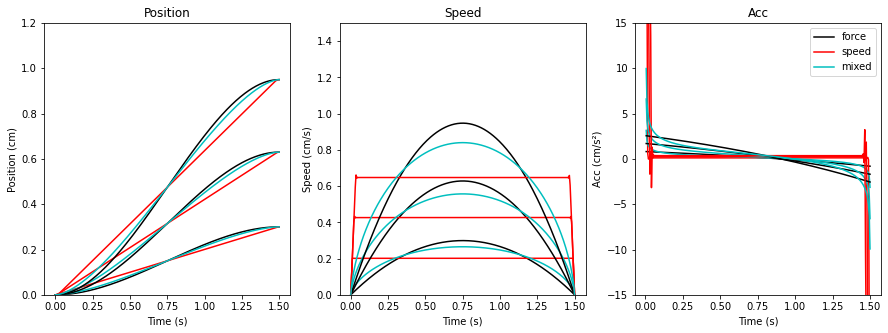

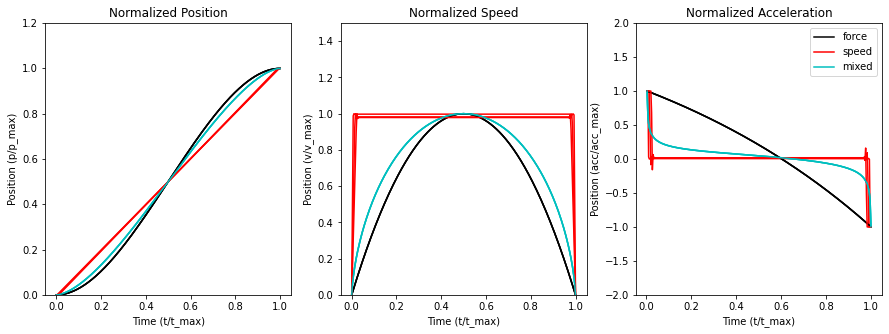

In [5]:
# initialize empty arrays. One set for each type of cost
###############################################
###############################################

n_comb = len(Ltread_list)
tf= 1.5 # re specify t

# speed
xk_vect_speed_heav = np.zeros((nk+1,n_comb))
xdotk_vect_speed_heav = np.zeros((nk+1,n_comb))
tk_vect_speed_heav = np.zeros((nk+1,n_comb))
acck_vect_speed_heav = np.zeros((nk,n_comb))
tak_vect_speed_heav = np.zeros((nk,n_comb))
oc_vect_speed_heav = np.zeros((1,n_comb))

# force
xk_vect_force_heav = np.zeros((nk+1,n_comb))
xdotk_vect_force_heav = np.zeros((nk+1,n_comb))
tk_vect_force_heav = np.zeros((nk+1,n_comb))
acck_vect_force_heav = np.zeros((nk,n_comb))
tak_vect_force_heav = np.zeros((nk,n_comb))
oc_vect_force_heav = np.zeros((1,n_comb))

# mixed
xk_vect_mixed_heav = np.zeros((nk+1,n_comb))
xdotk_vect_mixed_heav = np.zeros((nk+1,n_comb))
tk_vect_mixed_heav = np.zeros((nk+1,n_comb))
acck_vect_mixed_heav = np.zeros((nk,n_comb))
tak_vect_mixed_heav = np.zeros((nk,n_comb))
oc_vect_mixed_heav = np.zeros((1,n_comb))


# Loop: compute optimal trajectory for our 3 Distances [0.3, 0.63, 0.95]
###############################################
###############################################
for ic in range(n_comb):
    Ltread = Ltread_list[ic]
    print("ic is " + str(ic), "Dist: ", Ltread)

    # compute optimal trajectory when cost == speed
    ###############################################
    xk,xdotk,tk,acck,tak,oc = optimal_trajectory(cost='speed', a=a, b=b, tf=tf, Ltread=Ltread,
                                                 vtapis=vtapis, tau_res=tau_res, mass=mass, nk=nk)
    xk_vect_speed_heav[:,ic] = xk
    xdotk_vect_speed_heav[:,ic] = xdotk
    tk_vect_speed_heav[:,ic] = tk
    acck_vect_speed_heav[:,ic] = acck
    tak_vect_speed_heav[:,ic] = tak    
    oc_vect_speed_heav[:,ic] = oc     

    # compute optimal trajectory when cost == force
    ###############################################
    xk,xdotk,tk,acck,tak,oc = optimal_trajectory(cost='force', a=a, b=b, tf=tf, Ltread=Ltread,
                                                 vtapis=vtapis, tau_res=tau_res, mass=mass, nk=nk)   
    xk_vect_force_heav[:,ic] = xk
    xdotk_vect_force_heav[:,ic] = xdotk
    tk_vect_force_heav[:,ic] = tk
    acck_vect_force_heav[:,ic] = acck
    tak_vect_force_heav[:,ic] = tak    
    oc_vect_force_heav[:,ic] = oc 

    # compute optimal trajectory when cost == mixed
    ###############################################
    xk,xdotk,tk,acck,tak,oc = optimal_trajectory(cost='mixed', a=a, b=b, tf=tf, Ltread=Ltread,
                                                 vtapis=vtapis, tau_res=tau_res, mass=mass, nk=nk)     
    xk_vect_mixed_heav[:,ic] = xk
    xdotk_vect_mixed_heav[:,ic] = xdotk
    tk_vect_mixed_heav[:,ic] = tk
    acck_vect_mixed_heav[:,ic] = acck
    tak_vect_mixed_heav[:,ic] = tak    
    oc_vect_mixed_heav[:,ic] = oc 

# save results as pickle
###############################################
###############################################    
file_to_save_name = file_to_save_name_list[0]
results = {}
for i in ('xk_vect_speed_heav',  'xdotk_vect_speed_heav', 'tk_vect_speed_heav',
          'acck_vect_speed_heav','tak_vect_speed_heav',   'oc_vect_speed_heav',
          'xk_vect_force_heav',  'xdotk_vect_force_heav', 'tk_vect_force_heav',
          'acck_vect_force_heav','tak_vect_force_heav',   'oc_vect_force_heav'):
    results[i] = locals()[i]                    

with open(file_to_save_name, 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL) 



# Plot trajectories
###############################################
###############################################  
fig, axs = plt.subplots(ncols = 3, constrained_layout = False, figsize=(15, 5))
for ic in range(len(Ltread_list)):
# for each distance:
    # plot optimal [position][speed][acceleration] for the 3 costs that we computed before
    ## print("ic is " + str(ic), Ltread_list[ic])

    axs[0].set_ylim(0, 1.20)
    axs[0].set_title("Position")
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Position (cm)")
    axs[0].plot(tk_vect_speed_heav[:,ic],xk_vect_force_heav[:,ic], label = 'force', color='k')
    axs[0].plot(tk_vect_speed_heav[:,ic],xk_vect_speed_heav[:,ic], label = 'speed', color='r')
    axs[0].plot(tk_vect_speed_heav[:,ic],xk_vect_mixed_heav[:,ic], label = 'mixed', color='c')

    axs[1].set_ylim(0, 1.5)
    axs[1].set_title("Speed")
    axs[1].set_xlabel("Time (s)")
    axs[1].set_ylabel("Speed (cm/s)")
    axs[1].plot(tk_vect_speed_heav[:,ic],xdotk_vect_force_heav[:,ic], label = 'force', color='k')
    axs[1].plot(tk_vect_speed_heav[:,ic],xdotk_vect_speed_heav[:,ic], label = 'speed', color ='r')
    axs[1].plot(tk_vect_speed_heav[:,ic],xdotk_vect_mixed_heav[:,ic], label = 'mixed', color='c')

    axs[2].set_ylim(-15, 15)
    axs[2].set_title("Acc")
    axs[2].set_xlabel("Time (s)")
    axs[2].set_ylabel("Acc (cm/s²)")
    axs[2].plot(tk_vect_speed_heav[:,ic][1:],acck_vect_force_heav[:,ic], label = 'force', color='k')
    axs[2].plot(tk_vect_speed_heav[:,ic][1:],acck_vect_speed_heav[:,ic], label = 'speed', color='r')
    axs[2].plot(tk_vect_speed_heav[:,ic][1:],acck_vect_mixed_heav[:,ic], label = 'mixed', color='c')
# put legend only in the last plot, use this function to avoid having duplicates (we are in a loop)
legend_without_duplicate_labels(axs[2])



# Normalize by T_max and V_max
##########################################
fig, axs = plt.subplots(ncols = 3, constrained_layout = False, figsize=(15, 5))
for ic in range(len(Ltread_list)):
    axs[0].set_ylim(0, 1.20)
    axs[0].set_title("Normalized Position")
    axs[0].set_xlabel("Time (t/t_max)")
    axs[0].set_ylabel("Position (p/p_max)")
    axs[0].plot(tk_vect_speed_heav[:,ic]/max(tk_vect_speed_heav[:,ic]), xk_vect_force_heav[:,ic]/max(xk_vect_force_heav[:,ic]), label = 'force', color='k')
    axs[0].plot(tk_vect_speed_heav[:,ic]/max(tk_vect_speed_heav[:,ic]), xk_vect_speed_heav[:,ic]/max(xk_vect_speed_heav[:,ic]), label = 'speed', color='r')
    axs[0].plot(tk_vect_speed_heav[:,ic]/max(tk_vect_speed_heav[:,ic]), xk_vect_mixed_heav[:,ic]/max(xk_vect_mixed_heav[:,ic]), label = 'mixed', color='c')

    axs[1].set_ylim(0, 1.5)
    axs[1].set_title("Normalized Speed")
    axs[1].set_xlabel("Time (t/t_max)")
    axs[1].set_ylabel("Position (v/v_max)")
    axs[1].plot(tk_vect_speed_heav[:,ic]/max(tk_vect_speed_heav[:,ic]), xdotk_vect_force_heav[:,ic]/max(xdotk_vect_force_heav[:,ic]), label = 'force', color='k')
    axs[1].plot(tk_vect_speed_heav[:,ic]/max(tk_vect_speed_heav[:,ic]), xdotk_vect_speed_heav[:,ic]/max(xdotk_vect_speed_heav[:,ic]), label = 'speed', color ='r')
    axs[1].plot(tk_vect_speed_heav[:,ic]/max(tk_vect_speed_heav[:,ic]), xdotk_vect_mixed_heav[:,ic]/max(xdotk_vect_mixed_heav[:,ic]), label = 'mixed', color='c')

    axs[2].set_ylim(-2, 2)
    axs[2].set_title("Normalized Acceleration")
    axs[2].set_xlabel("Time (t/t_max)")
    axs[2].set_ylabel("Position (acc/acc_max)")
    axs[2].plot(tk_vect_speed_heav[:,ic][1:]/max(tk_vect_speed_heav[:,ic][1:]), acck_vect_force_heav[:,ic] / max(acck_vect_force_heav[:,ic]), label = 'force', color='k')
    axs[2].plot(tk_vect_speed_heav[:,ic][1:]/max(tk_vect_speed_heav[:,ic][1:]), acck_vect_speed_heav[:,ic]/max(acck_vect_speed_heav[:,ic]), label = 'speed', color='r')
    axs[2].plot(tk_vect_speed_heav[:,ic][1:]/max(tk_vect_speed_heav[:,ic][1:]), acck_vect_mixed_heav[:,ic]/max(acck_vect_mixed_heav[:,ic]), label = 'mixed', color='c')

legend_without_duplicate_labels(axs[2])

# Manipulate run duration
Same as above, excpet we keep distance constant and manipulate run duration

ic is 0 duration: 1.0
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    15292
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      900

Total number of variables............................:     3908
                     variables with only lower bounds:        1
                variables with lower and upper bounds:     2704
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3600
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will 

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    15292
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1200

Total number of variables............................:     3908
                     variables with only lower bounds:        1
                variables with lower and upper bounds:     2704
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3600
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will 

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    16192
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     2100

Total number of variables............................:     3908
                     variables with only lower bounds:        1
                variables with lower and upper bounds:     2704
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3600
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will 

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    15292
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      900

Total number of variables............................:     3908
                     variables with only lower bounds:        1
                variables with lower and upper bounds:     2704
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3600
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

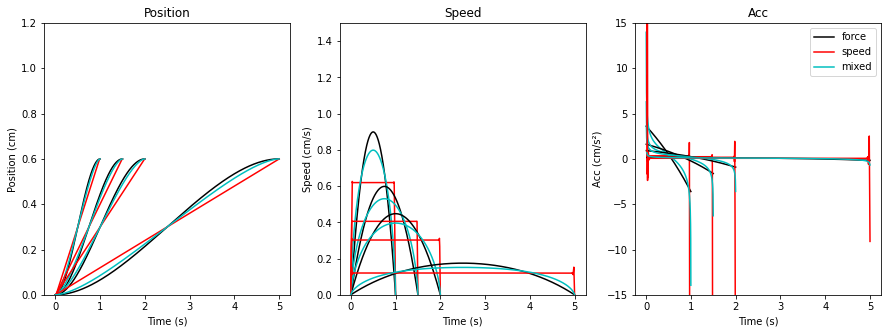

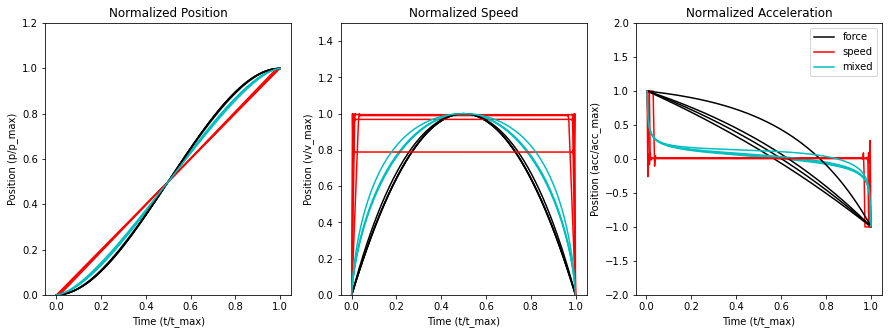

In [6]:
n_comb = len(tf_list)
Ltread = 0.60
# speed 
xk_vect_speed_heav = np.zeros((nk+1,n_comb))
xdotk_vect_speed_heav = np.zeros((nk+1,n_comb))
tk_vect_speed_heav = np.zeros((nk+1,n_comb))
acck_vect_speed_heav = np.zeros((nk,n_comb))
tak_vect_speed_heav = np.zeros((nk,n_comb))
oc_vect_speed_heav = np.zeros((1,n_comb))

# force
xk_vect_force_heav = np.zeros((nk+1,n_comb))
xdotk_vect_force_heav = np.zeros((nk+1,n_comb))
tk_vect_force_heav = np.zeros((nk+1,n_comb))
acck_vect_force_heav = np.zeros((nk,n_comb))
tak_vect_force_heav = np.zeros((nk,n_comb))
oc_vect_force_heav = np.zeros((1,n_comb))

# mixed
xk_vect_mixed_heav = np.zeros((nk+1,n_comb))
xdotk_vect_mixed_heav = np.zeros((nk+1,n_comb))
tk_vect_mixed_heav = np.zeros((nk+1,n_comb))
acck_vect_mixed_heav = np.zeros((nk,n_comb))
tak_vect_mixed_heav = np.zeros((nk,n_comb))
oc_vect_mixed_heav = np.zeros((1,n_comb))

for ic in range(n_comb):

    tf = tf_list[ic]
    print("ic is " + str(ic), "duration:", tf)

    ###############################################
    xk,xdotk,tk,acck,tak,oc = optimal_trajectory(cost='speed', a=a, b=b, tf=tf, Ltread=Ltread,
                                                 vtapis=vtapis, tau_res=tau_res, mass=mass, nk=nk)
    xk_vect_speed_heav[:,ic] = xk
    xdotk_vect_speed_heav[:,ic] = xdotk
    tk_vect_speed_heav[:,ic] = tk
    acck_vect_speed_heav[:,ic] = acck
    tak_vect_speed_heav[:,ic] = tak    
    oc_vect_speed_heav[:,ic] = oc     

    ###############################################
    xk,xdotk,tk,acck,tak,oc = optimal_trajectory(cost='force', a=a, b=b, tf=tf, Ltread=Ltread,
                                                 vtapis=vtapis, tau_res=tau_res, mass=mass, nk=nk)   
    xk_vect_force_heav[:,ic] = xk
    xdotk_vect_force_heav[:,ic] = xdotk
    tk_vect_force_heav[:,ic] = tk
    acck_vect_force_heav[:,ic] = acck
    tak_vect_force_heav[:,ic] = tak    
    oc_vect_force_heav[:,ic] = oc 


    ###############################################
    xk,xdotk,tk,acck,tak,oc = optimal_trajectory(cost='mixed', a=a, b=b, tf=tf, Ltread=Ltread,
                                                 vtapis=vtapis, tau_res=tau_res, mass=mass, nk=nk)     
    xk_vect_mixed_heav[:,ic] = xk
    xdotk_vect_mixed_heav[:,ic] = xdotk
    tk_vect_mixed_heav[:,ic] = tk
    acck_vect_mixed_heav[:,ic] = acck
    tak_vect_mixed_heav[:,ic] = tak    
    oc_vect_mixed_heav[:,ic] = oc 

###############################################
###############################################    
file_to_save_name = file_to_save_name_list[0]
results = {}
for i in ('xk_vect_speed_heav',  'xdotk_vect_speed_heav', 'tk_vect_speed_heav',
          'acck_vect_speed_heav','tak_vect_speed_heav',   'oc_vect_speed_heav',
          'xk_vect_force_heav',  'xdotk_vect_force_heav', 'tk_vect_force_heav',
          'acck_vect_force_heav','tak_vect_force_heav',   'oc_vect_force_heav'):
    results[i] = locals()[i]                    

with open(file_to_save_name, 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL) 




# Plot trajectories
###############################################
###############################################  
fig, axs = plt.subplots(ncols = 3, constrained_layout = False, figsize=(15, 5))
for ic in range(len(tf_list)):
# for each distance:
    # plot optimal [position][speed][acceleration] for the 3 costs that we computed before
    ## print("ic is " + str(ic), Ltread_list[ic])

    axs[0].set_ylim(0, 1.20)
    axs[0].set_title("Position")
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Position (cm)")
    axs[0].plot(tk_vect_speed_heav[:,ic],xk_vect_force_heav[:,ic], label = 'force', color='k')
    axs[0].plot(tk_vect_speed_heav[:,ic],xk_vect_speed_heav[:,ic], label = 'speed', color='r')
    axs[0].plot(tk_vect_speed_heav[:,ic],xk_vect_mixed_heav[:,ic], label = 'mixed', color='c')

    axs[1].set_ylim(0, 1.5)
    axs[1].set_title("Speed")
    axs[1].set_xlabel("Time (s)")
    axs[1].set_ylabel("Speed (cm/s)")
    axs[1].plot(tk_vect_speed_heav[:,ic],xdotk_vect_force_heav[:,ic], label = 'force', color='k')
    axs[1].plot(tk_vect_speed_heav[:,ic],xdotk_vect_speed_heav[:,ic], label = 'speed', color ='r')
    axs[1].plot(tk_vect_speed_heav[:,ic],xdotk_vect_mixed_heav[:,ic], label = 'mixed', color='c')

    axs[2].set_ylim(-15, 15)
    axs[2].set_title("Acc")
    axs[2].set_xlabel("Time (s)")
    axs[2].set_ylabel("Acc (cm/s²)")
    axs[2].plot(tk_vect_speed_heav[:,ic][1:],acck_vect_force_heav[:,ic], label = 'force', color='k')
    axs[2].plot(tk_vect_speed_heav[:,ic][1:],acck_vect_speed_heav[:,ic], label = 'speed', color='r')
    axs[2].plot(tk_vect_speed_heav[:,ic][1:],acck_vect_mixed_heav[:,ic], label = 'mixed', color='c')
# put legend only in the last plot, use this function to avoid having duplicates (we are in a loop)
legend_without_duplicate_labels(axs[2])




# Normalize by T_max and V_max
##########################################
fig, axs = plt.subplots(ncols = 3, constrained_layout = False, figsize=(15, 5))
for ic in range(len(tf_list)):
    axs[0].set_ylim(0, 1.20)
    axs[0].set_title("Normalized Position")
    axs[0].set_xlabel("Time (t/t_max)")
    axs[0].set_ylabel("Position (p/p_max)")
    axs[0].plot(tk_vect_speed_heav[:,ic]/max(tk_vect_speed_heav[:,ic]), xk_vect_force_heav[:,ic]/max(xk_vect_force_heav[:,ic]), label = 'force', color='k')
    axs[0].plot(tk_vect_speed_heav[:,ic]/max(tk_vect_speed_heav[:,ic]), xk_vect_speed_heav[:,ic]/max(xk_vect_speed_heav[:,ic]), label = 'speed', color='r')
    axs[0].plot(tk_vect_speed_heav[:,ic]/max(tk_vect_speed_heav[:,ic]), xk_vect_mixed_heav[:,ic]/max(xk_vect_mixed_heav[:,ic]), label = 'mixed', color='c')

    axs[1].set_ylim(0, 1.5)
    axs[1].set_title("Normalized Speed")
    axs[1].set_xlabel("Time (t/t_max)")
    axs[1].set_ylabel("Position (v/v_max)")
    axs[1].plot(tk_vect_speed_heav[:,ic]/max(tk_vect_speed_heav[:,ic]), xdotk_vect_force_heav[:,ic]/max(xdotk_vect_force_heav[:,ic]), label = 'force', color='k')
    axs[1].plot(tk_vect_speed_heav[:,ic]/max(tk_vect_speed_heav[:,ic]), xdotk_vect_speed_heav[:,ic]/max(xdotk_vect_speed_heav[:,ic]), label = 'speed', color ='r')
    axs[1].plot(tk_vect_speed_heav[:,ic]/max(tk_vect_speed_heav[:,ic]), xdotk_vect_mixed_heav[:,ic]/max(xdotk_vect_mixed_heav[:,ic]), label = 'mixed', color='c')

    axs[2].set_ylim(-2, 2)
    axs[2].set_title("Normalized Acceleration")
    axs[2].set_xlabel("Time (t/t_max)")
    axs[2].set_ylabel("Position (acc/acc_max)")
    axs[2].plot(tk_vect_speed_heav[:,ic][1:]/max(tk_vect_speed_heav[:,ic][1:]), acck_vect_force_heav[:,ic] / max(acck_vect_force_heav[:,ic]), label = 'force', color='k')
    axs[2].plot(tk_vect_speed_heav[:,ic][1:]/max(tk_vect_speed_heav[:,ic][1:]), acck_vect_speed_heav[:,ic]/max(acck_vect_speed_heav[:,ic]), label = 'speed', color='r')
    axs[2].plot(tk_vect_speed_heav[:,ic][1:]/max(tk_vect_speed_heav[:,ic][1:]), acck_vect_mixed_heav[:,ic]/max(acck_vect_mixed_heav[:,ic]), label = 'mixed', color='c')

legend_without_duplicate_labels(axs[2])

# Manipulate run distance and run duration
Use distances and run times from animal behavior (e.g. on average all rats run 30cm in 1s, etc.)

ic is 0 duration: 1
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    15292
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      900

Total number of variables............................:     3908
                     variables with only lower bounds:        1
                variables with lower and upper bounds:     2704
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3600
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will 

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    15292
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1200

Total number of variables............................:     3908
                     variables with only lower bounds:        1
                variables with lower and upper bounds:     2704
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3600
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will 

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    16192
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     2100

Total number of variables............................:     3908
                     variables with only lower bounds:        1
                variables with lower and upper bounds:     2704
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3600
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will 

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    15292
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      900

Total number of variables............................:     3908
                     variables with only lower bounds:        1
                variables with lower and upper bounds:     2704
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3600
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

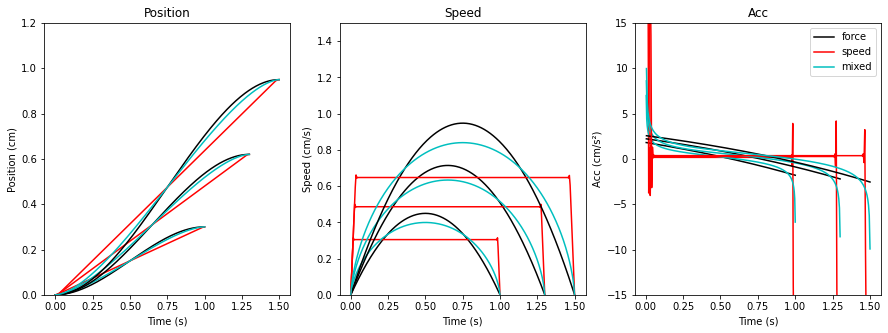

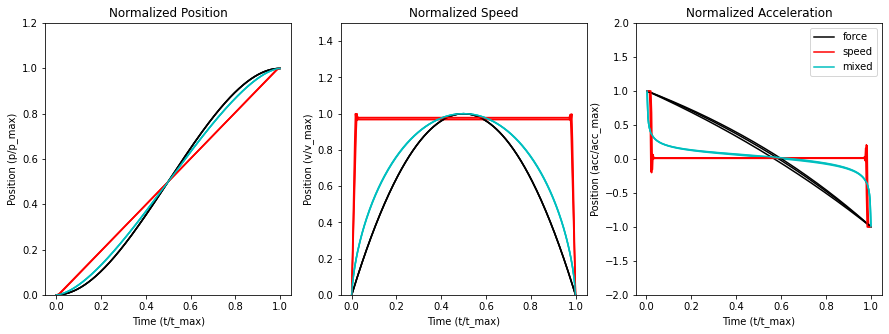

In [7]:

testtf = [1, 1.3, 1.5]
testdist = [0.30, 0.62, 0.95]
n_comb = len(testtf)
# speed 
xk_vect_speed_heav = np.zeros((nk+1,n_comb))
xdotk_vect_speed_heav = np.zeros((nk+1,n_comb))
tk_vect_speed_heav = np.zeros((nk+1,n_comb))
acck_vect_speed_heav = np.zeros((nk,n_comb))
tak_vect_speed_heav = np.zeros((nk,n_comb))
oc_vect_speed_heav = np.zeros((1,n_comb))

# force
xk_vect_force_heav = np.zeros((nk+1,n_comb))
xdotk_vect_force_heav = np.zeros((nk+1,n_comb))
tk_vect_force_heav = np.zeros((nk+1,n_comb))
acck_vect_force_heav = np.zeros((nk,n_comb))
tak_vect_force_heav = np.zeros((nk,n_comb))
oc_vect_force_heav = np.zeros((1,n_comb))

# mixed
xk_vect_mixed_heav = np.zeros((nk+1,n_comb))
xdotk_vect_mixed_heav = np.zeros((nk+1,n_comb))
tk_vect_mixed_heav = np.zeros((nk+1,n_comb))
acck_vect_mixed_heav = np.zeros((nk,n_comb))
tak_vect_mixed_heav = np.zeros((nk,n_comb))
oc_vect_mixed_heav = np.zeros((1,n_comb))

for ic in range(n_comb):

    tf = testtf[ic]
    Ltread = testdist[ic]
    print("ic is " + str(ic), "duration:", tf)

    ###############################################
    xk,xdotk,tk,acck,tak,oc = optimal_trajectory(cost='speed', a=a, b=b, tf=tf, Ltread=Ltread,
                                                 vtapis=vtapis, tau_res=tau_res, mass=mass, nk=nk)
    xk_vect_speed_heav[:,ic] = xk
    xdotk_vect_speed_heav[:,ic] = xdotk
    tk_vect_speed_heav[:,ic] = tk
    acck_vect_speed_heav[:,ic] = acck
    tak_vect_speed_heav[:,ic] = tak    
    oc_vect_speed_heav[:,ic] = oc     

    ###############################################
    xk,xdotk,tk,acck,tak,oc = optimal_trajectory(cost='force', a=a, b=b, tf=tf, Ltread=Ltread,
                                                 vtapis=vtapis, tau_res=tau_res, mass=mass, nk=nk)   
    xk_vect_force_heav[:,ic] = xk
    xdotk_vect_force_heav[:,ic] = xdotk
    tk_vect_force_heav[:,ic] = tk
    acck_vect_force_heav[:,ic] = acck
    tak_vect_force_heav[:,ic] = tak    
    oc_vect_force_heav[:,ic] = oc 


    ###############################################
    xk,xdotk,tk,acck,tak,oc = optimal_trajectory(cost='mixed', a=a, b=b, tf=tf, Ltread=Ltread,
                                                 vtapis=vtapis, tau_res=tau_res, mass=mass, nk=nk)     
    xk_vect_mixed_heav[:,ic] = xk
    xdotk_vect_mixed_heav[:,ic] = xdotk
    tk_vect_mixed_heav[:,ic] = tk
    acck_vect_mixed_heav[:,ic] = acck
    tak_vect_mixed_heav[:,ic] = tak    
    oc_vect_mixed_heav[:,ic] = oc 

###############################################
###############################################    
file_to_save_name = file_to_save_name_list[0]
results = {}
for i in ('xk_vect_speed_heav',  'xdotk_vect_speed_heav', 'tk_vect_speed_heav',
          'acck_vect_speed_heav','tak_vect_speed_heav',   'oc_vect_speed_heav',
          'xk_vect_force_heav',  'xdotk_vect_force_heav', 'tk_vect_force_heav',
          'acck_vect_force_heav','tak_vect_force_heav',   'oc_vect_force_heav'):
    results[i] = locals()[i]                    

with open(file_to_save_name, 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL) 




# Plot trajectories
###############################################
###############################################  
fig, axs = plt.subplots(ncols = 3, constrained_layout = False, figsize=(15, 5))
for ic in range(n_comb):
# for each distance:
    # plot optimal [position][speed][acceleration] for the 3 costs that we computed before
    ## print("ic is " + str(ic), Ltread_list[ic])

    axs[0].set_ylim(0, 1.20)
    axs[0].set_title("Position")
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Position (cm)")
    axs[0].plot(tk_vect_speed_heav[:,ic],xk_vect_force_heav[:,ic], label = 'force', color='k')
    axs[0].plot(tk_vect_speed_heav[:,ic],xk_vect_speed_heav[:,ic], label = 'speed', color='r')
    axs[0].plot(tk_vect_speed_heav[:,ic],xk_vect_mixed_heav[:,ic], label = 'mixed', color='c')

    axs[1].set_ylim(0, 1.5)
    axs[1].set_title("Speed")
    axs[1].set_xlabel("Time (s)")
    axs[1].set_ylabel("Speed (cm/s)")
    axs[1].plot(tk_vect_speed_heav[:,ic],xdotk_vect_force_heav[:,ic], label = 'force', color='k')
    axs[1].plot(tk_vect_speed_heav[:,ic],xdotk_vect_speed_heav[:,ic], label = 'speed', color ='r')
    axs[1].plot(tk_vect_speed_heav[:,ic],xdotk_vect_mixed_heav[:,ic], label = 'mixed', color='c')

    axs[2].set_ylim(-15, 15)
    axs[2].set_title("Acc")
    axs[2].set_xlabel("Time (s)")
    axs[2].set_ylabel("Acc (cm/s²)")
    axs[2].plot(tk_vect_speed_heav[:,ic][1:],acck_vect_force_heav[:,ic], label = 'force', color='k')
    axs[2].plot(tk_vect_speed_heav[:,ic][1:],acck_vect_speed_heav[:,ic], label = 'speed', color='r')
    axs[2].plot(tk_vect_speed_heav[:,ic][1:],acck_vect_mixed_heav[:,ic], label = 'mixed', color='c')
# put legend only in the last plot, use this function to avoid having duplicates (we are in a loop)
legend_without_duplicate_labels(axs[2])




# Normalize by T_max and V_max
##########################################
fig, axs = plt.subplots(ncols = 3, constrained_layout = False, figsize=(15, 5))
for ic in range(n_comb):
    axs[0].set_ylim(0, 1.20)
    axs[0].set_title("Normalized Position")
    axs[0].set_xlabel("Time (t/t_max)")
    axs[0].set_ylabel("Position (p/p_max)")
    axs[0].plot(tk_vect_speed_heav[:,ic]/max(tk_vect_speed_heav[:,ic]), xk_vect_force_heav[:,ic]/max(xk_vect_force_heav[:,ic]), label = 'force', color='k')
    axs[0].plot(tk_vect_speed_heav[:,ic]/max(tk_vect_speed_heav[:,ic]), xk_vect_speed_heav[:,ic]/max(xk_vect_speed_heav[:,ic]), label = 'speed', color='r')
    axs[0].plot(tk_vect_speed_heav[:,ic]/max(tk_vect_speed_heav[:,ic]), xk_vect_mixed_heav[:,ic]/max(xk_vect_mixed_heav[:,ic]), label = 'mixed', color='c')

    axs[1].set_ylim(0, 1.5)
    axs[1].set_title("Normalized Speed")
    axs[1].set_xlabel("Time (t/t_max)")
    axs[1].set_ylabel("Position (v/v_max)")
    axs[1].plot(tk_vect_speed_heav[:,ic]/max(tk_vect_speed_heav[:,ic]), xdotk_vect_force_heav[:,ic]/max(xdotk_vect_force_heav[:,ic]), label = 'force', color='k')
    axs[1].plot(tk_vect_speed_heav[:,ic]/max(tk_vect_speed_heav[:,ic]), xdotk_vect_speed_heav[:,ic]/max(xdotk_vect_speed_heav[:,ic]), label = 'speed', color ='r')
    axs[1].plot(tk_vect_speed_heav[:,ic]/max(tk_vect_speed_heav[:,ic]), xdotk_vect_mixed_heav[:,ic]/max(xdotk_vect_mixed_heav[:,ic]), label = 'mixed', color='c')

    axs[2].set_ylim(-2, 2)
    axs[2].set_title("Normalized Acceleration")
    axs[2].set_xlabel("Time (t/t_max)")
    axs[2].set_ylabel("Position (acc/acc_max)")
    axs[2].plot(tk_vect_speed_heav[:,ic][1:]/max(tk_vect_speed_heav[:,ic][1:]), acck_vect_force_heav[:,ic] / max(acck_vect_force_heav[:,ic]), label = 'force', color='k')
    axs[2].plot(tk_vect_speed_heav[:,ic][1:]/max(tk_vect_speed_heav[:,ic][1:]), acck_vect_speed_heav[:,ic]/max(acck_vect_speed_heav[:,ic]), label = 'speed', color='r')
    axs[2].plot(tk_vect_speed_heav[:,ic][1:]/max(tk_vect_speed_heav[:,ic][1:]), acck_vect_mixed_heav[:,ic]/max(acck_vect_mixed_heav[:,ic]), label = 'mixed', color='c')

legend_without_duplicate_labels(axs[2])

# Universal function 

When we normalize by $T_{final}$ and $V_{max}$ all curves overlap.  
We have a universal function --> model this function.

## Test with gaussian function
Gaussian Function:  
$f(x) = \frac{1}{\sigma\sqrt{2\pi}}*exp^{-[\frac{(x-\mu)^2} {2\sigma^2}]}$  
<br>
Rationale: On the origin of asymetric bell-shaped velocity profiles in rapid-aimed movements. R Plamondon. 1991.

He used the following equation to describe a bell_shaped velocity profile:

$v(t) = \frac{\bar{V}(t_1 - t_0)}{\sigma\sqrt{2\pi}(t-t_0)}*exp^{-[\frac{(ln(\frac{t-t_0}{t_1-t_0})-\mu)^2} {2\sigma^2}]}$  
<br>
With:  
$\bar{V} =$ mean velocity  
$t_0 =$ time start of run (v>0, reaction time) --> maybe too soon for our case, our threshold for the start of a run is much higher than $\approx 0 $   
$t_1 =$ very end of movement (v=0 again) --> too late, our treshold for end of run is higher  
such as $t_1-t_0=$ entire movement time, for v=0 to v=0 again  
$\mu =$ mean of the gaussian  
$\sigma =$ variance of the gaussian  
You can play with these parameters and see how they shape the velocity profile (blue line) below.  
<br>  

### Relationship between $v_{max}$ and $v_{moy}$  
Find $v_{max}$ and $t_{vmax}$:  
Compute $\frac{dv}{dt}=0$  
I computed derivative (twice) and found $v'(t)= -\frac{\bar{V}(t_1-t_0) * exp^{(-\frac{(ln(\frac{t-t_0}{t_1-t_0})-\mu)^2}{2\sigma^2})}  * (ln(\frac{t-t_0}{t_1-t_0})+\sigma^2-\mu)}{\sqrt{2\pi}\sigma^3(t-t_0)^2}$  
You can see the derivative plotted in orange on the plot.  
<br>  
I found 1 solution for $v'(t)=0$ at $t_{vmax}=t_0-exp^{\mu-\sigma^2}(t_0-t_1)$  

We have $max(v)$ at $v(t_{vmax})$:  
$v(t_{vmax}) = \frac{\bar{V}(t_1-t_0)}{\sigma\sqrt{2\pi}(-e^{\mu-\sigma^2})(t_0-t_1)} * exp^{-[\frac{(ln(\frac{e^{\mu-\sigma^2})(t_0-t_1)}{t_1-t_0})-\mu)^2} {2\sigma^2}]}$  
$v_{max}$ and $t_{vmax}$ are the black dots on the plot.  
<br>  


### Relationship between $v_{max}$ and $Dist$  
We have:  
$\bar{V} = \frac{Dist}{t_1-t_0}$  
<br>
Above equation simplifies to:  
$v(t_{vmax}) = \frac{Dist}{\sigma\sqrt{2\pi}(-e^{\mu-\sigma^2})(t_0-t_1)} * exp^{-[\frac{(ln(\frac{e^{\mu-\sigma^2})(t_0-t_1)}{t_1-t_0})-\mu)^2} {2\sigma^2}]}$  
<br>  

# Plot interactive gaussian function 

$+$ These equations can easily link  $v_{max}$, $v_{moy}$ $t_{max}$ and $Dist$  
$+$ Looks like animal behavior (asymetric)  
$-$ Does not look like the model curves   
$-$ Run start and run end shifted due to different speed threshold (could select part of gaussian that we are interested in)

In [8]:
from ipywidgets import interactive

def vgaussian(Vmoy=1, t_0=0, t_1=1.2, mu=-1, sigma=0.25):
    plt.figure(1)
    T = np.linspace(0.01, 2, 100)
    Y = ((Vmoy * (t_1 - t_0)) / (sigma * np.sqrt(2*np.pi) * (T - t_0))) * np.exp(-(((np.log((T-t_0)/(t_1-t_0))-mu)**2 )* 1/(2*sigma**2)))
    dY = ((Vmoy * (t_1 - t_0)) * (np.exp(-(((np.log((T-t_0)/(t_1-t_0))-mu)**2 )* 1/(2*sigma**2)))) * (np.log((T-t_0)/(t_1-t_0)) + sigma**2 - mu)) / ((sigma**3) * np.sqrt(2*np.pi) * (T-t_0)**2)
    tVmax = t_0 - np.exp(mu - sigma ** 2) * (t_0-t_1)
    Ymax = ((Vmoy * (t_1 - t_0)) / (sigma * np.sqrt(2*np.pi) * (tVmax - t_0))) * np.exp(-(((np.log((tVmax-t_0)/(t_1-t_0))-mu)**2 )* 1/(2*sigma**2)))


    print("V_max=", Ymax, "at t=", tVmax)
    plt.plot(T, Y, label = "speed profile")
    plt.plot(T, dY, lw=0.5, label = "derivative")
    plt.plot((tVmax, tVmax), (0, Ymax), marker='o', ms =5, color='k', lw=0.5)
   
    plt.ylim(-1, 5)
    plt.xlim(0, 1)
    plt.xlabel("time(s)")
    plt.ylabel("speed(a.u.)")
    plt.axhline(0, 0, 1, ls='--', color='k', lw=0.5)
    plt.show()

interactive_plot = interactive(vgaussian, Vmoy=(0, 2.5, 0.5), t_0=(0.0), t_1=(0,2.0), mu=(-2,0,0.05), sigma=(0.05, 1, 0.05))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='Vmoy', max=2.5, step=0.5), FloatSlider(value=0.0, de…

# test with parabola
Model generated curves look like parabolas  
compute parabola equation that goes through 3 points (v(t=0)=0, v(t=tf)=0, v(t=tvmax)=vmax)

$+$ looks like model generated curves  
$-$ symetrical with vmax at t=tf/2  
$-$ does not look like animal behavior  
$-$ no direct link between $v_{max}$, $v_{moy}$ $t_{max}$ and $Dist$ 


In [9]:
def calc_parabola(x1, y1, x2, y2, x3, y3):
    denom = (x1-x2) * (x1-x3) * (x2-x3);
    A     = (x3 * (y2-y1) + x2 * (y1-y3) + x1 * (y3-y2)) / denom;
    B     = (x3*x3 * (y1-y2) + x2*x2 * (y3-y1) + x1*x1 * (y2-y3)) / denom;
    C     = (x2 * x3 * (x2-x3) * y1+x3 * x1 * (x3-x1) * y2+x1 * x2 * (x1-x2) * y3) / denom;
    return A,B,C

def vparabola(Vmax, tf):
    plt.figure(1)
    # known xy
    x1,y1=[0,0]
    x2,y2=[tf,0]
    x3,y3=[tf/2,Vmax]
    a,b,c=calc_parabola(x1, y1, x2, y2, x3, y3)
    x_pos=np.linspace(0,tf,100)
    y_pos=[]

    for x in range(len(x_pos)):
        x_val=x_pos[x]
        y=(a*(x_val**2))+(b*x_val)+c
        y_pos.append(y)

    print("y=", a, "x**2 + ", b, "x +", c)
    plt.plot(x_pos, y_pos, color='black') # parabola line
    # plt.scatter(x_pos, y_pos, color='gray') # parabola points
    plt.scatter(x1,y1,color='r',marker="D",s=50) # 1st known xy
    plt.scatter(x2,y2,color='g',marker="D",s=50) # 2nd known xy
    plt.scatter(x3,y3,color='k',marker="D",s=50) # 3rd known xy
    plt.xlim(0, 5)
    plt.ylim(0, 150)
    plt.show() 

interactive_plot = interactive(vparabola, Vmax=(0, 100, 5), tf=(0, 5.0))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=50, description='Vmax', step=5), FloatSlider(value=2.5, description='tf'…

# Test
this function looks interesting:  

$v(t) = vMax * (1- \left\lvert tf*t-1 \right\rvert ^n) *  (1-q*(tf*t-1))$  
Can be simplified to:  
$v_2(t) = vMax * (1- (tf*t-1) ^n) *  (1-q*(tf*t-1))$, when $n=2k$  
$v_2'(t) = vMax*tf*n*(tf*t-1) ^{n-1} *  (q*(tf*t-1)-1)+ tf*q* ((tf*t-1) ^{n-1})$

vmax = /!\ speed at middle of curve (vmax when q==0)   
n = shoulder curvature (n>0)  
q = assymetry coefficient (-1 to 1) (right to left tilt)  
tf = final time of mvt 

In [10]:
def vtest(vMax=1, n=2, q=0, tf=2):
    plt.figure(1)
    T = np.linspace(0, tf, 200)
    tf=2/tf
    #Y = vMax*(1 - np.abs(tf*T - 1)**n) * (1 - q * (tf*T - 1))
 
    #can be simplified to following equ. if n=2k
    Y = vMax*(1 - (tf*T - 1)**n) * (1 - q * (tf*T - 1))
    dY = vMax*tf*n* (tf*T - 1)**(n-1) * (q * (tf*T - 1)-1) + tf*q*((tf*T - 1)**n-1)

    plt.plot(T, Y)
    plt.plot(T, dY)

    plt.ylim(0, 2)
    plt.xlim(0, 5)
    plt.axhline(0, 0, 1, ls='--', color='k', lw=0.5)
    plt.show()

interactive_plot = interactive(vtest, vMax=(0, 2,.1), n=(0, 10, 1), q=(-1, 1, 0.1), tf=(0, 5, .1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='vMax', max=2.0), IntSlider(value=2, description='n',…

# Generate traj, speed profile, acc profile
With init  $x_0$, end position $x_f$ and movement time $tf$  
From: FLASH & HOGAN, 1985 The Coordination of Arm Movements: An Experimentally Confirmed Mathematical Model

$+$ These equations can easily link  $v_{max}$, $t_{max}$ and $Dist$  
$+$ Looks like animal behavior, but symetrical 


In [11]:
def vtest2(x_0 = 0, x_f= 95, tf=1.5):
    plt.figure(1)
    T = np.linspace(0, tf, 500)

    Y = x_0 + (x_0 - x_f)*((15 * (T/tf) **4)-(6 * (T/tf) **5)-(10 * (T/tf) **3))
    dY = ((x_0-x_f) * (-30*T**2)*(T-tf)**2)/(tf**5)
    ddY = ((-60*T)*(x_0-x_f) * (2*T**2 - 3*T*tf + tf**2))/(tf**5)


    plt.plot(T, Y)
    plt.plot(T, dY)
    plt.plot(T, ddY/10)

    plt.scatter(tf/2, (-15*(x_0-x_f))/(8*tf))

    plt.ylim(-50, 150)
    plt.xlim(0, 5)
    plt.axhline(0, 0, 1, ls='--', color='k', lw=0.5)
    plt.show()

interactive_plot = interactive(vtest2, x_0=(0, 120, 1), x_f=(0, 120, 1), tf=(0, 5.0, .1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=0, description='x_0', max=120), IntSlider(value=95, description='x_f', m…

# Ideas
Add constraint on acceleration: not same acceleration profile between animals and model  
Change cost between acceleration/deceleration: in the model the speed profiles are symetrical, whereas rat speed profiles are not. Deceleration more costly?  
Add an initial/final speed !=0 in the model: in rats we detect start/end of runs based on a speed threshold, so animal speed at start of run is not == 0.  